In [1]:
import os
import sys
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import csv

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA/AirDNA/data_Final.csv')

<ipython-input-3-87429c407d4f>:1: DtypeWarning: Columns (18,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DSL/EDA/AirDNA/data_Final.csv')


In [4]:
data.head()

,Created Date,Last Scraped Date,Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Bedrooms,Max Guests,Response Rate,Airbnb Response Time (Text),...,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Pets Allowed,Amenities,Final_Cancellation_Policy,Unnamed: 30,Unnamed: 31
0,2012-08-02,2016-02-12,NaN,0.0,0,26.0,1.0,3.0,80.0,NaN,...,10.0,9.0,10.0,10.0,10.0,False,NaN,flexible,NaN,NaN
1,2012-08-15,2015-05-09,NaN,0.0,0,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,flexible,NaN,NaN
2,2012-08-21,2015-05-09,NaN,0.0,0,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,moderate,NaN,NaN
3,2012-09-01,2021-08-04,NaN,0.0,0,1.0,2.0,4.0,90.0,within a few hours,...,10.0,8.0,10.0,8.0,10.0,False,NaN,strict,NaN,NaN
4,2012-10-12,2016-03-05,NaN,0.0,0,15.0,1.0,3.0,80.0,NaN,...,10.0,9.0,10.0,10.0,9.0,False,NaN,flexible,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78425 entries, 0 to 78424
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Created Date                  76000 non-null  object 
 1   Last Scraped Date             78425 non-null  object 
 2   Annual Revenue LTM (USD)      72660 non-null  float64
 3   Occupancy Rate LTM            24036 non-null  float64
 4   Number of Bookings LTM        78425 non-null  int64  
 5   Number of Reviews             77854 non-null  float64
 6   Bedrooms                      78341 non-null  float64
 7   Max Guests                    78267 non-null  float64
 8   Response Rate                 68125 non-null  float64
 9   Airbnb Response Time (Text)   51245 non-null  object 
 10  Airbnb Superhost              74333 non-null  object 
 11  Cleaning Fee (USD)            40197 non-null  float64
 12  Extra People Fee (USD)        25776 non-null  float64
 13  P

In [6]:
# 0 데이터 삭제
data = data[data['Annual Revenue LTM (USD)'] != 0]

In [7]:
#결측치 삭제
data = data.dropna(subset=['Annual Revenue LTM (USD)'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18270 entries, 24 to 78380
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Created Date                  18187 non-null  object 
 1   Last Scraped Date             18270 non-null  object 
 2   Annual Revenue LTM (USD)      18270 non-null  float64
 3   Occupancy Rate LTM            18270 non-null  float64
 4   Number of Bookings LTM        18270 non-null  int64  
 5   Number of Reviews             18270 non-null  float64
 6   Bedrooms                      18270 non-null  float64
 7   Max Guests                    18270 non-null  float64
 8   Response Rate                 16200 non-null  float64
 9   Airbnb Response Time (Text)   18065 non-null  object 
 10  Airbnb Superhost              18146 non-null  object 
 11  Cleaning Fee (USD)            9536 non-null   float64
 12  Extra People Fee (USD)        2993 non-null   float64
 13  

In [9]:
data.describe(include = np.object_)

,Created Date,Last Scraped Date,Airbnb Response Time (Text),Airbnb Superhost,Check-in Time,Checkout Time,Number of Photos,Exact Location,Pets Allowed,Amenities,Final_Cancellation_Policy
count,18187,18270,18065,18146,17639,15512,18270.0,18256,18187,15514,15879
unique,2225,494,4,2,149,27,220.0,2,2,11736,22
top,2019-12-13,2022-08-15,within an hour,False,After 3:00 PM,0.458333333,10.0,False,False,"[""kitchen"", ""wireless_internet"", ""hangers"", ""l...",strict
freq,355,6376,14264,15980,7271,10871,523.0,14059,16601,29,6674


날짜 데이터 전처리

In [10]:
# 날짜 형식으로 변환
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Last Scraped Date'] = pd.to_datetime(data['Last Scraped Date'])

# 'Accommodation Operating Period' 열 생성
data['Accommodation Operating Period'] = (data['Last Scraped Date'] - data['Created Date']).dt.days

# 결과 확인
print(data)

      Created Date Last Scraped Date  Annual Revenue LTM (USD)  \
24      2013-10-29        2022-08-15                  61576.92   
30      2013-12-14        2022-08-14                  68582.28   
47      2014-03-13        2022-08-15                  74376.69   
51      2014-04-13        2021-12-08                  60000.00   
52      2014-04-18        2022-08-14                  50000.00   
...            ...               ...                       ...   
78353   2020-10-23        2022-08-14                    113.00   
78356   2020-02-19        2022-08-15                   2613.00   
78376   2020-03-06        2022-08-14                   1785.00   
78377   2020-10-22        2022-08-15                   3040.00   
78380   2020-10-16        2022-03-12                    854.00   

       Occupancy Rate LTM  Number of Bookings LTM  Number of Reviews  \
24            6404000.000                      49               40.0   
30            5418000.000                      34              

In [11]:
data = data.drop(columns = ['Created Date', 'Last Scraped Date'])

In [12]:
data = data.drop(columns = ['Check-in Time', 'Checkout Time'])

Airbnb Response Time (Text) 전처리

In [13]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 907.9 kB/s eta 0:00:00


In [14]:
unique_categories = data['Airbnb Response Time (Text)'].unique()

print(unique_categories)

['within a few hours' 'within an hour' 'a few days or more' 'within a day'
 nan]


In [15]:

from category_encoders import OrdinalEncoder

ordinal_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

# OrdinalEncoder를 사용하여 'Time to Delivery' 열에 적용
encoder = OrdinalEncoder(mapping=[{'col': 'Airbnb Response Time (Text)', 'mapping': ordinal_mapping}])


# 범주형 변수의 열 선택
categorical_columns = 'Airbnb Response Time (Text)' #여러 개 할거면 리스트 형태로 삽입

# Fit and transform the specified columns
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])


# 변환 결과 확인
data

,Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Bedrooms,Max Guests,Response Rate,Airbnb Response Time (Text),Airbnb Superhost,Cleaning Fee (USD),...,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Pets Allowed,Amenities,Final_Cancellation_Policy,Unnamed: 30,Unnamed: 31,Accommodation Operating Period
24,61576.92,6404000.000,49,40.0,1.0,3.0,99.0,3.0,False,NaN,...,9.0,10.0,10.0,9.0,False,NaN,moderate,NaN,NaN,3212.0
30,68582.28,5418000.000,34,31.0,1.0,3.0,99.0,3.0,False,NaN,...,10.0,10.0,10.0,10.0,False,NaN,strict,NaN,NaN,3165.0
47,74376.69,8478943.000,52,5.0,1.0,2.0,100.0,4.0,False,NaN,...,10.0,10.0,10.0,9.0,False,NaN,flexible,NaN,NaN,3077.0
51,60000.00,960000.000,3,1.0,1.0,1.0,100.0,3.0,False,NaN,...,10.0,10.0,10.0,10.0,False,NaN,flexible,NaN,NaN,2796.0
52,50000.00,50000.000,1,0.0,1.0,1.0,0.0,1.0,False,NaN,...,NaN,NaN,NaN,NaN,False,NaN,flexible,NaN,NaN,3040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78353,113.00,0.161,3,0.0,1.0,4.0,97.0,3.0,False,NaN,...,NaN,NaN,NaN,NaN,False,"[""kitchen"", ""wireless_internet"", ""dryer"", ""han...",NaN,NaN,NaN,660.0
78356,2613.00,0.642,69,21.0,1.0,1.0,100.0,4.0,True,NaN,...,10.0,10.0,10.0,10.0,False,"[""kitchen"", ""wireless_internet"", ""iron"", ""hair...",NaN,NaN,NaN,908.0
78376,1785.00,0.259,12,2.0,1.0,4.0,100.0,4.0,False,5.0,...,10.0,10.0,10.0,10.0,False,"[""free_parking"", ""kitchen"", ""wireless_internet...",NaN,NaN,NaN,891.0
78377,3040.00,0.655,49,0.0,1.0,3.0,100.0,4.0,False,NaN,...,NaN,NaN,NaN,NaN,False,"[""kitchen"", ""wireless_internet"", ""dryer"", ""iro...",NaN,NaN,NaN,662.0


결측치 처리

<Axes: >

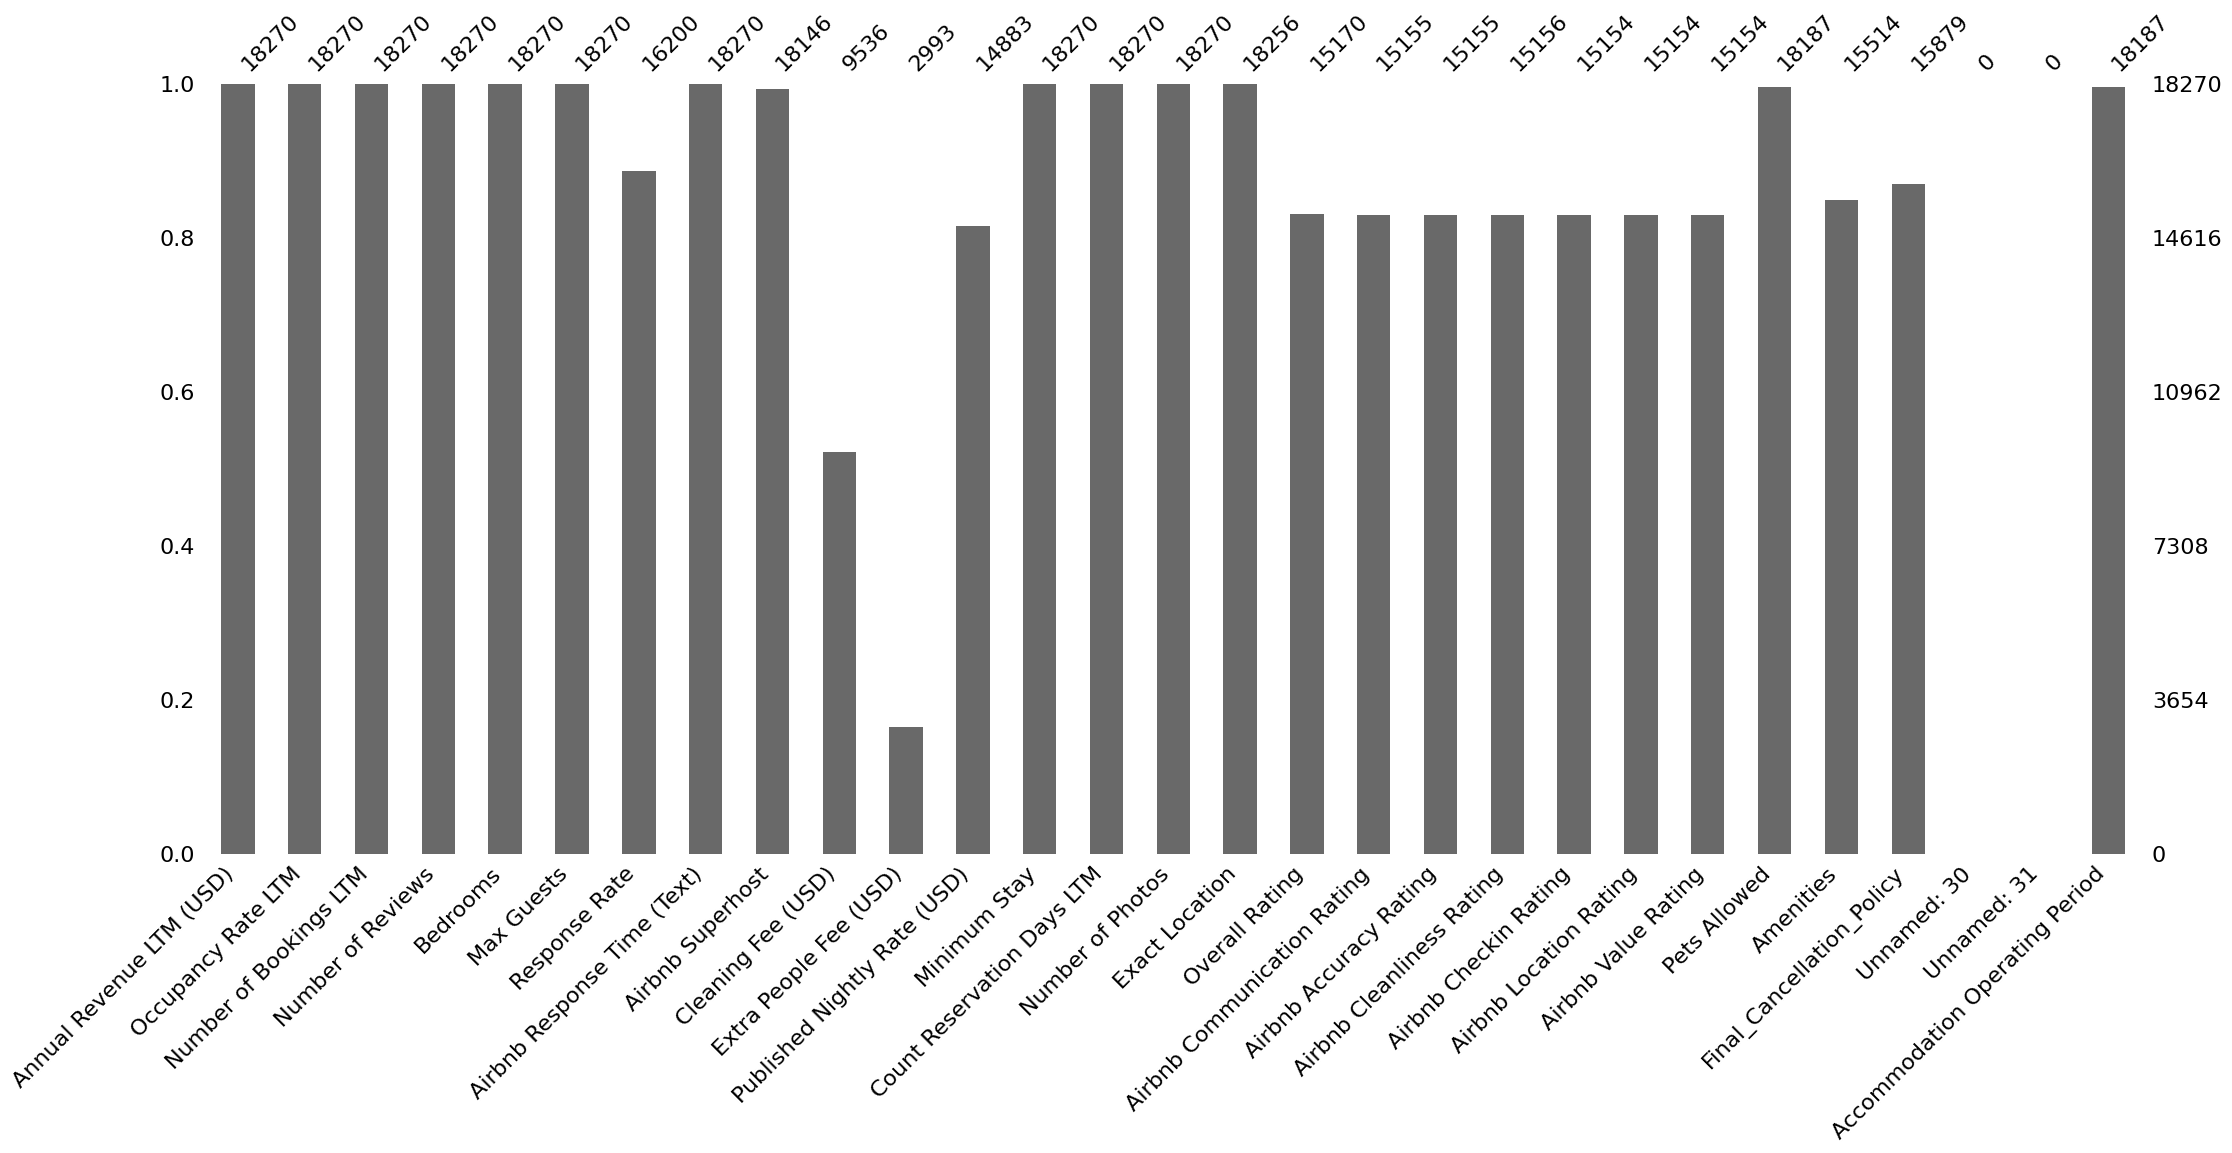

In [16]:
msno.bar(data)

In [17]:
# Airbnb Superhost 결측치는 FALSE로 대체
data['Airbnb Superhost'].fillna('FALSE', inplace=True)

In [18]:
# Pets Allowed 결측치는 'FALSE' 처리
data['Pets Allowed'].fillna('FALSE', inplace=True)

In [19]:
#Cleaning Fee (USD)	) 결측치는 0 처리
data['Cleaning Fee (USD)'].fillna(0, inplace=True)

In [20]:
# Extra People Fee (USD) 결측치는 0 처리
data['Extra People Fee (USD)'].fillna(0, inplace=True)

In [21]:
data['Airbnb Superhost'] = data['Airbnb Superhost'].astype(str)

In [22]:
data['Pets Allowed'] = data['Pets Allowed'].astype(str)

In [23]:
data.head()

,Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Bedrooms,Max Guests,Response Rate,Airbnb Response Time (Text),Airbnb Superhost,Cleaning Fee (USD),...,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Pets Allowed,Amenities,Final_Cancellation_Policy,Unnamed: 30,Unnamed: 31,Accommodation Operating Period
24,61576.92,6404000.0,49,40.0,1.0,3.0,99.0,3.0,False,0.0,...,9.0,10.0,10.0,9.0,False,NaN,moderate,NaN,NaN,3212.0
30,68582.28,5418000.0,34,31.0,1.0,3.0,99.0,3.0,False,0.0,...,10.0,10.0,10.0,10.0,False,NaN,strict,NaN,NaN,3165.0
47,74376.69,8478943.0,52,5.0,1.0,2.0,100.0,4.0,False,0.0,...,10.0,10.0,10.0,9.0,False,NaN,flexible,NaN,NaN,3077.0
51,60000.00,960000.0,3,1.0,1.0,1.0,100.0,3.0,False,0.0,...,10.0,10.0,10.0,10.0,False,NaN,flexible,NaN,NaN,2796.0
52,50000.00,50000.0,1,0.0,1.0,1.0,0.0,1.0,False,0.0,...,NaN,NaN,NaN,NaN,False,NaN,flexible,NaN,NaN,3040.0


In [24]:
data['Airbnb Superhost'] = data['Airbnb Superhost'].str.lower().map({'true': 1, 'false': 0})

In [25]:
data['Pets Allowed'] = data['Pets Allowed'].str.lower().map({'true': 1, 'false': 0})

In [26]:
data['Airbnb Response Time (Text)'] = data['Airbnb Response Time (Text)'].astype('category').values
data['Amenities'] = data['Amenities'].astype('category').values


In [27]:
# "amenities" 열의 문자열을 쉼표로 분리하고, 각 행의 문자열 길이를 계산하여 "amenities" 열 대체 (편의성 정도)

data['Amenities'] = data['Amenities'].apply(lambda x: len(x.split(',')))

In [28]:
# Amenities 결측치는 0 처리
data['Amenities'].fillna(0, inplace=True)

In [29]:
data. duplicated().sum()

2

In [30]:
# 중복된 행 제거
data = data.drop_duplicates()

In [31]:
data. duplicated().sum()

0

<Axes: >

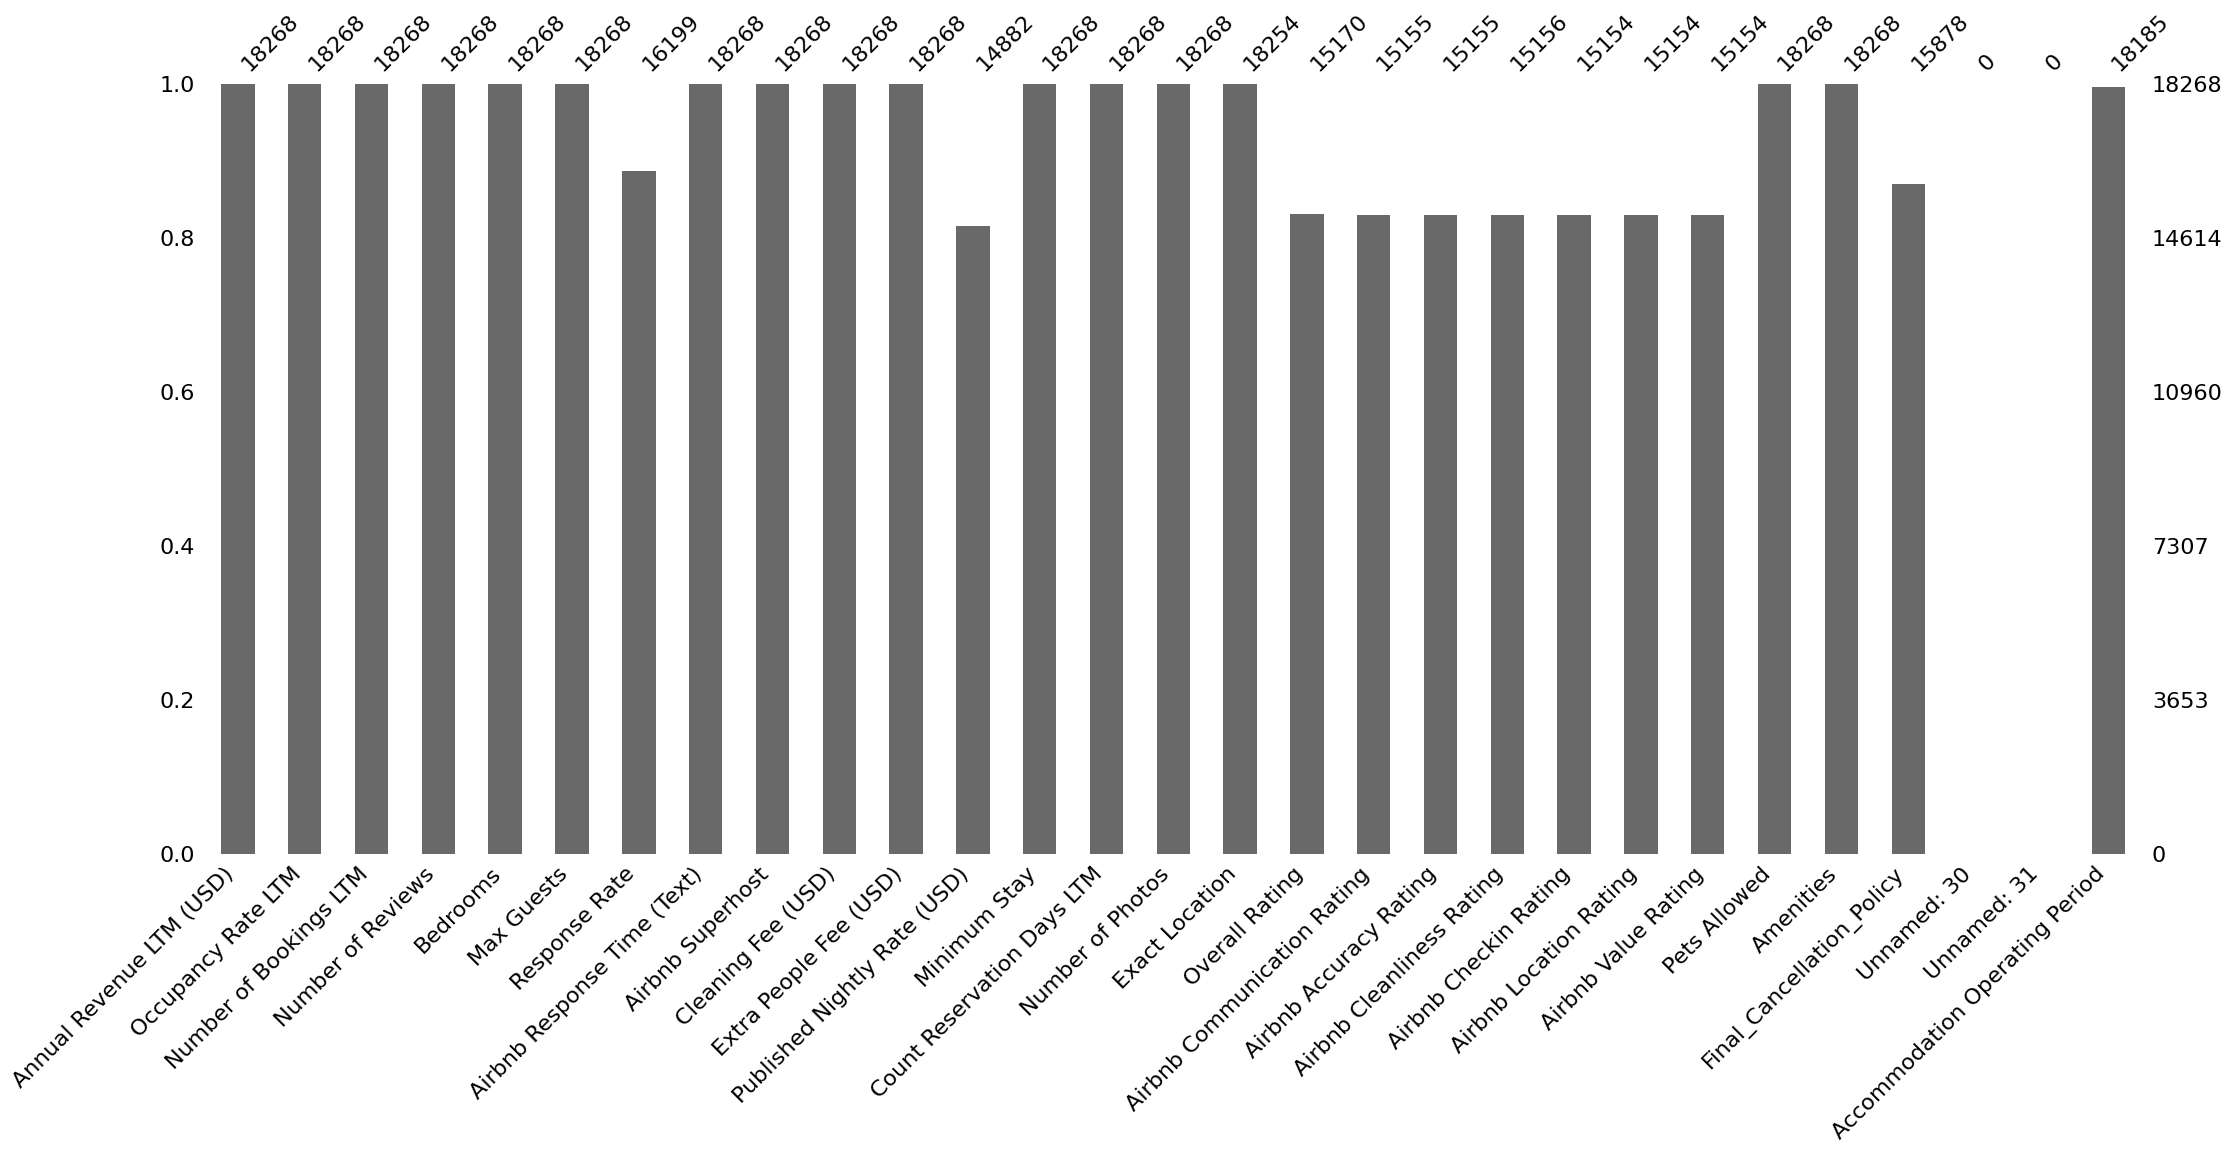

In [32]:
msno.bar(data)

In [33]:
data = data.drop(columns=['Final_Cancellation_Policy'])

In [34]:
data = data.drop(columns=['Unnamed: 30', 'Unnamed: 31'])

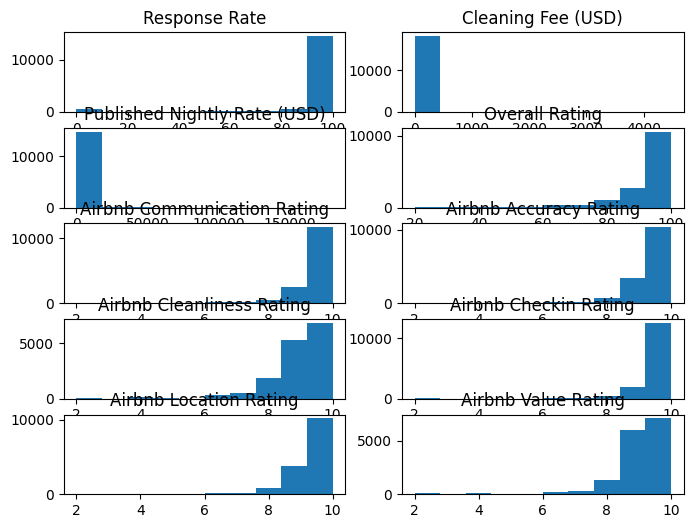

In [35]:
#남아있는 결측값의 대체값을 정하기 위해 해당 변수들의 분포 확인 -> skew 있음
na_col = ['Response Rate', 'Cleaning Fee (USD)', 'Published Nightly Rate (USD)', 'Overall Rating', 'Airbnb Communication Rating', 'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating', 'Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Value Rating']

plt.figure(figsize=(8,6))
for i in range(10):
  plt.subplot(5, 2, i+1)
  plt.title(na_col[i])
  plt.hist(data[na_col[i]])

plt.show()


In [36]:
#결측치는 학습 데이터의 중앙값으로 대체
data.fillna(data.median(), inplace=True)
data.isnull().sum()

<ipython-input-36-f6ceb5811d7d>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Annual Revenue LTM (USD)          0
Occupancy Rate LTM                0
Number of Bookings LTM            0
Number of Reviews                 0
Bedrooms                          0
Max Guests                        0
Response Rate                     0
Airbnb Response Time (Text)       0
Airbnb Superhost                  0
Cleaning Fee (USD)                0
Extra People Fee (USD)            0
Published Nightly Rate (USD)      0
Minimum Stay                      0
Count Reservation Days LTM        0
Number of Photos                  0
Exact Location                    0
Overall Rating                    0
Airbnb Communication Rating       0
Airbnb Accuracy Rating            0
Airbnb Cleanliness Rating         0
Airbnb Checkin Rating             0
Airbnb Location Rating            0
Airbnb Value Rating               0
Pets Allowed                      0
Amenities                         0
Accommodation Operating Period    0
dtype: int64

<Axes: >

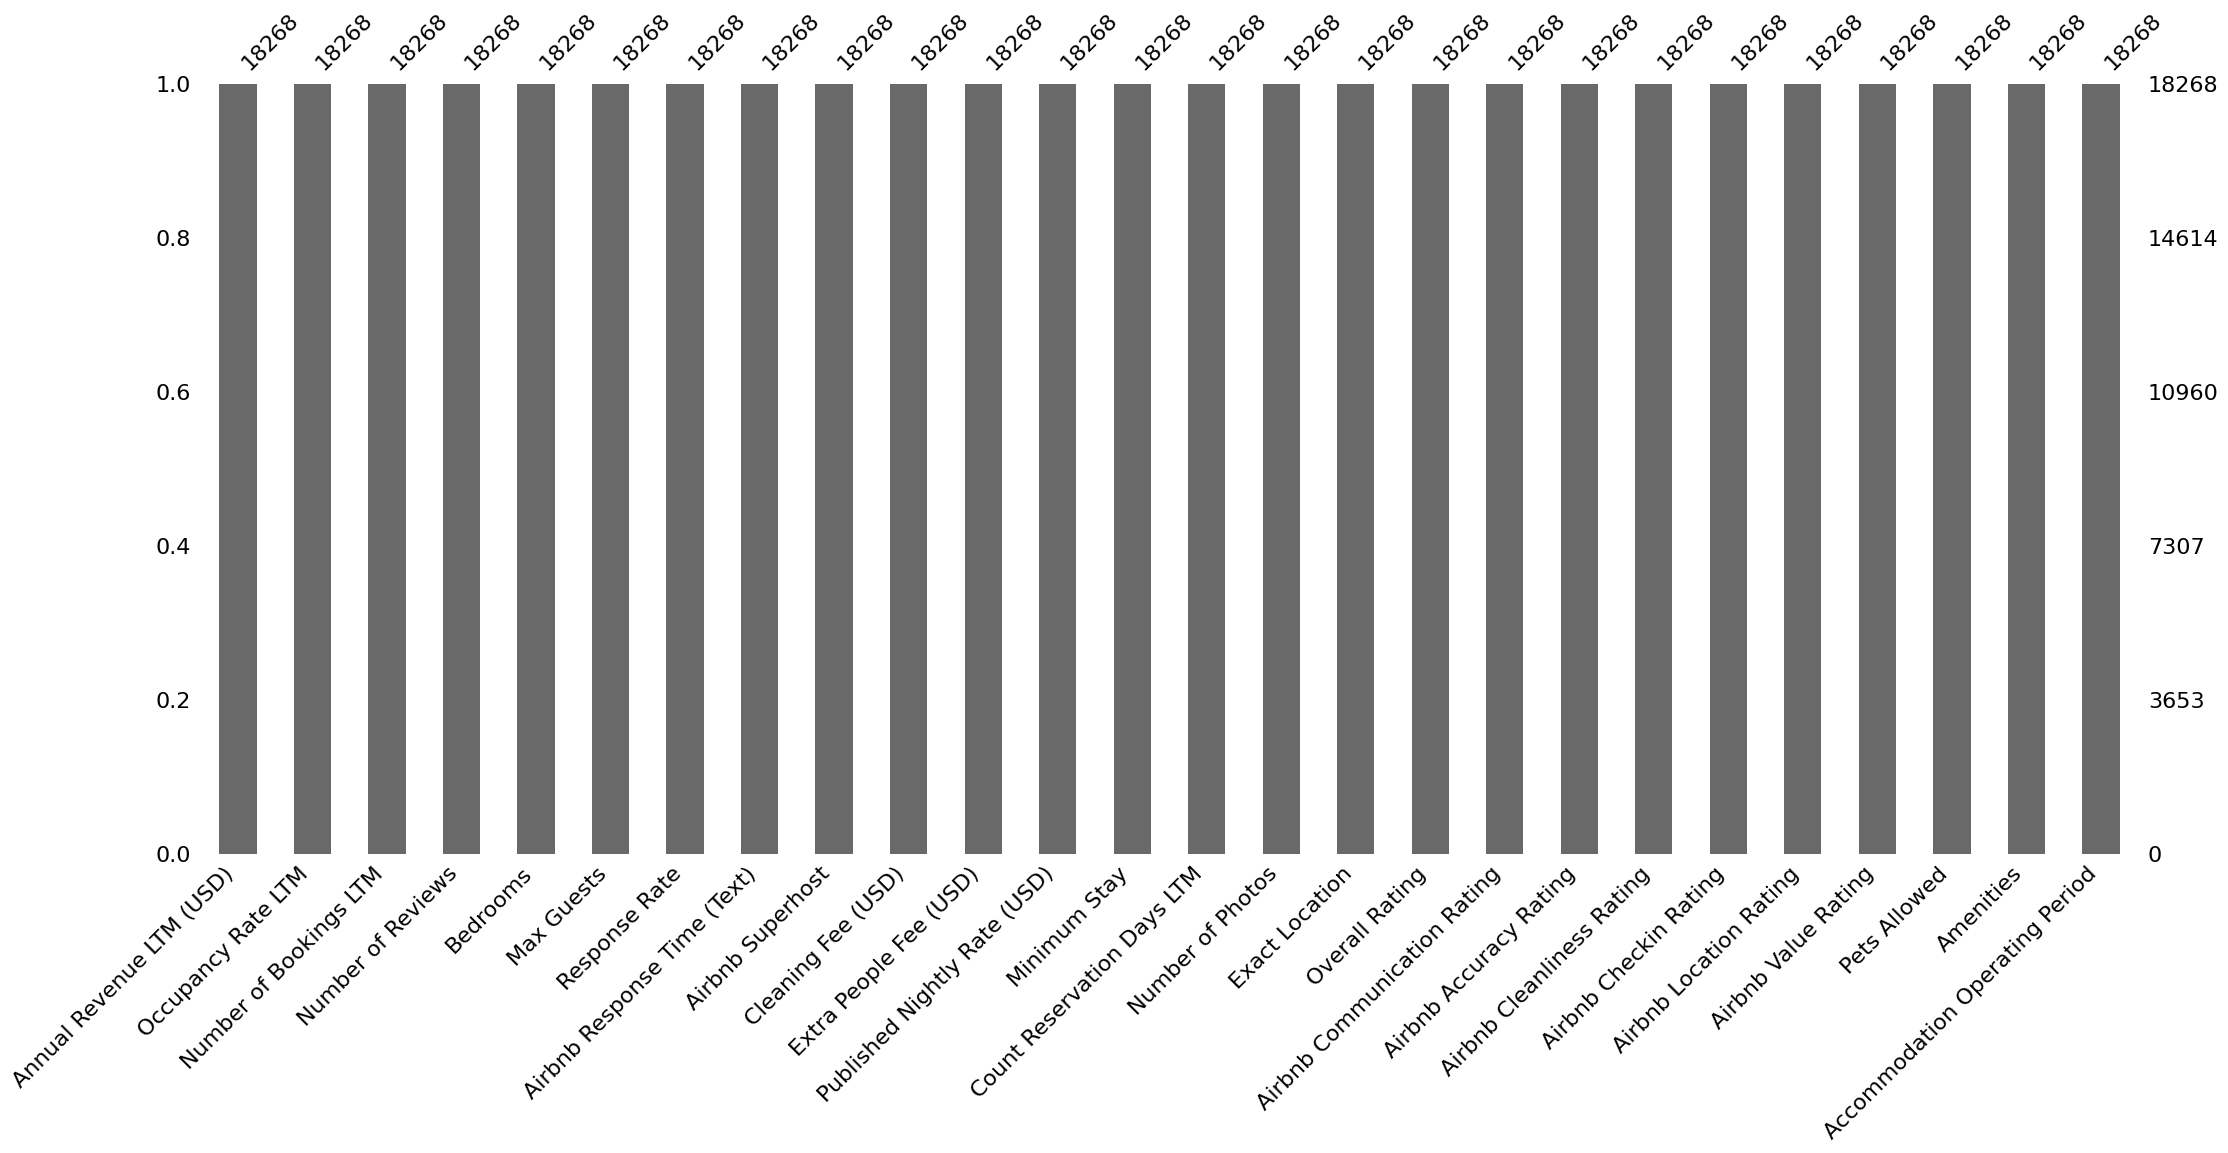

In [37]:
msno.bar(data)

skewness, kurtosis 조정

In [38]:
print("skewness: %.2f" %data['Published Nightly Rate (USD)'].skew())
print("kurtosis: %.2f" %data['Published Nightly Rate (USD)'].kurt())

skewness: 43.56
kurtosis: 2773.75


In [39]:
min_thr, max_thr = data['Published Nightly Rate (USD)'].quantile([0.01, 0.99])
print(min_thr, max_thr)

11.0 539.0


In [40]:
data = data[(data['Published Nightly Rate (USD)'] > min_thr) & (data['Published Nightly Rate (USD)'] < max_thr)]
print(data.shape)
data.head()

(17820, 26)


,Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Bedrooms,Max Guests,Response Rate,Airbnb Response Time (Text),Airbnb Superhost,Cleaning Fee (USD),...,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Pets Allowed,Amenities,Accommodation Operating Period
52,50000.00,50000.0,1,0.0,1.0,1.0,0.0,1.0,0,0.0,...,95.0,10.0,10.0,9.0,10.0,10.0,9.0,0,0.0,3040.0
87,285.34,38521.0,12,6.0,3.0,6.0,100.0,3.0,0,0.0,...,88.0,10.0,9.0,7.0,10.0,8.0,8.0,1,0.0,2917.0
99,89.91,18341.0,68,102.0,1.0,4.0,100.0,4.0,0,100.0,...,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.0,2896.0
103,91.31,14793.0,58,62.0,1.0,4.0,100.0,4.0,0,100.0,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.0,2892.0
176,90.89,15997.0,59,92.0,1.0,4.0,100.0,4.0,0,100.0,...,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.0,2756.0


In [41]:
print("skewness: %.2f" %data['Published Nightly Rate (USD)'].skew())
print("kurtosis: %.2f" %data['Published Nightly Rate (USD)'].kurt())

skewness: 3.48
kurtosis: 16.72


In [42]:
# Annual Revenue LTM (USD)
print("skewness: %.2f" %data['Annual Revenue LTM (USD)'].skew())
print("kurtosis: %.2f" %data['Annual Revenue LTM (USD)'].kurt())

skewness: 9.22
kurtosis: 145.65


In [43]:
Q1 = data['Annual Revenue LTM (USD)'].quantile(0.25)
Q3 = data['Annual Revenue LTM (USD)'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Annual Revenue LTM (USD)'] < Q1 - 1.5 * IQR) | (data['Annual Revenue LTM (USD)'] > Q3 + 1.5 * IQR))]

In [44]:
min_thr, max_thr = data['Annual Revenue LTM (USD)'].quantile([0.01, 0.99])
print(min_thr, max_thr)

33.0 19396.580000000016


In [45]:
data = data[(data['Annual Revenue LTM (USD)'] > min_thr) & (data['Annual Revenue LTM (USD)'] < max_thr)]
print(data.shape)
data.head()

(14867, 26)


,Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Bedrooms,Max Guests,Response Rate,Airbnb Response Time (Text),Airbnb Superhost,Cleaning Fee (USD),...,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Pets Allowed,Amenities,Accommodation Operating Period
87,285.34,38521.0,12,6.0,3.0,6.0,100.0,3.0,0,0.0,...,88.0,10.0,9.0,7.0,10.0,8.0,8.0,1,0.0,2917.0
99,89.91,18341.0,68,102.0,1.0,4.0,100.0,4.0,0,100.0,...,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.0,2896.0
103,91.31,14793.0,58,62.0,1.0,4.0,100.0,4.0,0,100.0,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.0,2892.0
176,90.89,15997.0,59,92.0,1.0,4.0,100.0,4.0,0,100.0,...,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.0,2756.0
400,140.75,563.0,4,31.0,1.0,3.0,100.0,3.0,0,300.0,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.0,2224.0


In [46]:
print("skewness: %.2f" %data['Annual Revenue LTM (USD)'].skew())
print("kurtosis: %.2f" %data['Annual Revenue LTM (USD)'].kurt())

skewness: 1.59
kurtosis: 2.12


시각화

<ipython-input-44-cb4cf4aa6626>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = 'Neighborhood', y = 'Published Nightly Rate (USD)', palette='Set3',


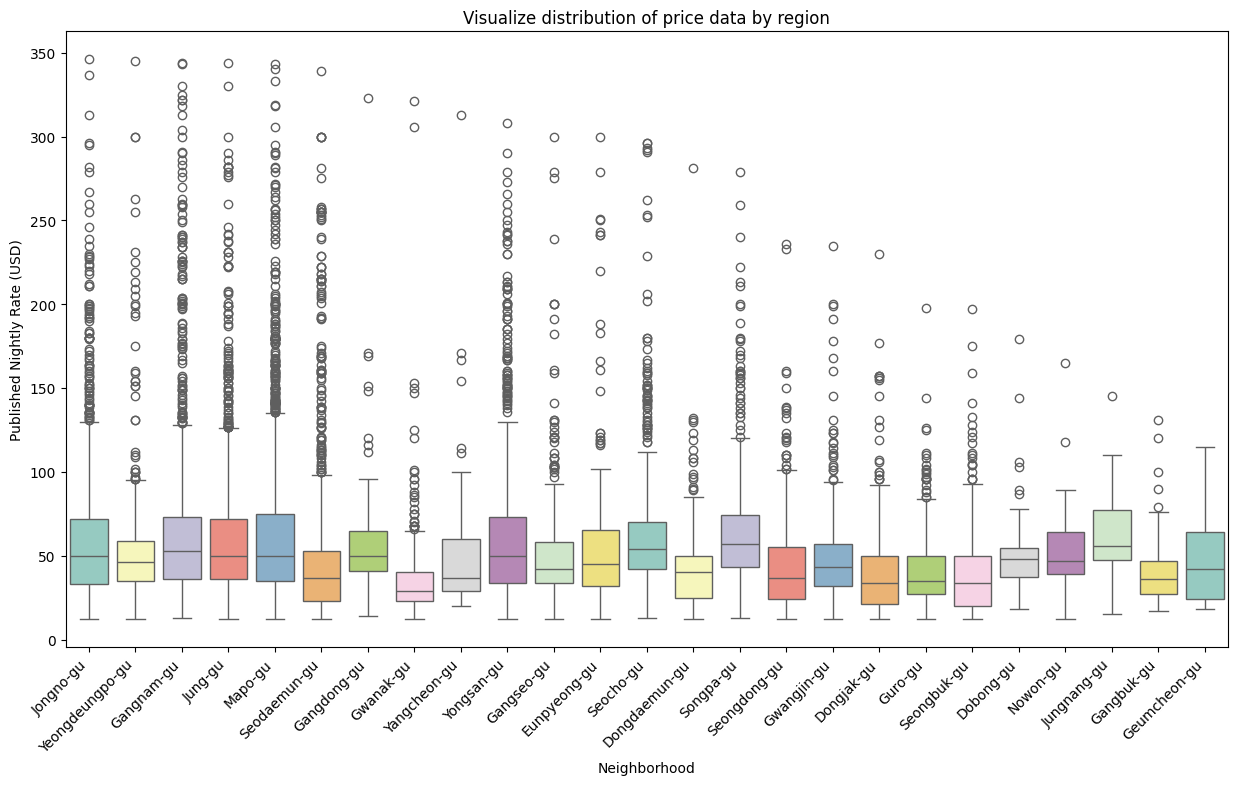

In [ ]:
# 각 지역별 숙박비 데이터를 박스플롯으로 시각화
plt.figure(figsize=(15, 8))  # 그래프 전체 크기 조절
sns.boxplot(data = data, x = 'Neighborhood', y = 'Published Nightly Rate (USD)', palette='Set3',
            order=data.groupby('Neighborhood')['Published Nightly Rate (USD)'].max().sort_values(ascending=False).index)
plt.xlabel('Neighborhood')
plt.ylabel('Published Nightly Rate (USD)')
plt.title('Visualize distribution of price data by region')
plt.xticks(rotation=45, ha="right")
plt.show()


<ipython-input-45-bdb71685cbad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Neighborhood', y='Published Nightly Rate (USD)', palette='Set3',


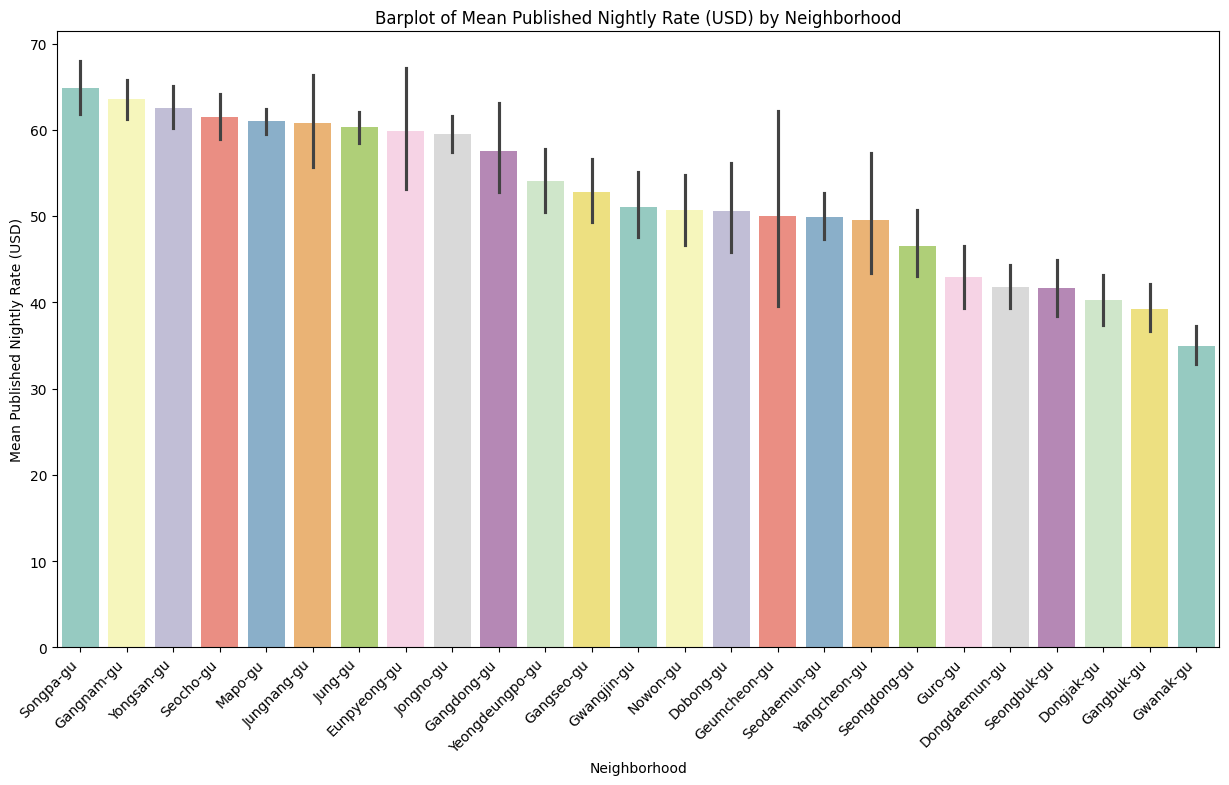

In [ ]:
plt.figure(figsize=(15, 8))  # 그래프 전체 크기 조절
sns.barplot(data=data, x='Neighborhood', y='Published Nightly Rate (USD)', palette='Set3',
            order=data.groupby('Neighborhood')['Published Nightly Rate (USD)'].mean().sort_values(ascending=False).index)
plt.xlabel('Neighborhood')
plt.ylabel('Mean Published Nightly Rate (USD)')
plt.title('Barplot of Mean Published Nightly Rate (USD) by Neighborhood')
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-46-7dc45704b9e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = 'Neighborhood', y = 'Annual Revenue LTM (USD)', palette='Set3',


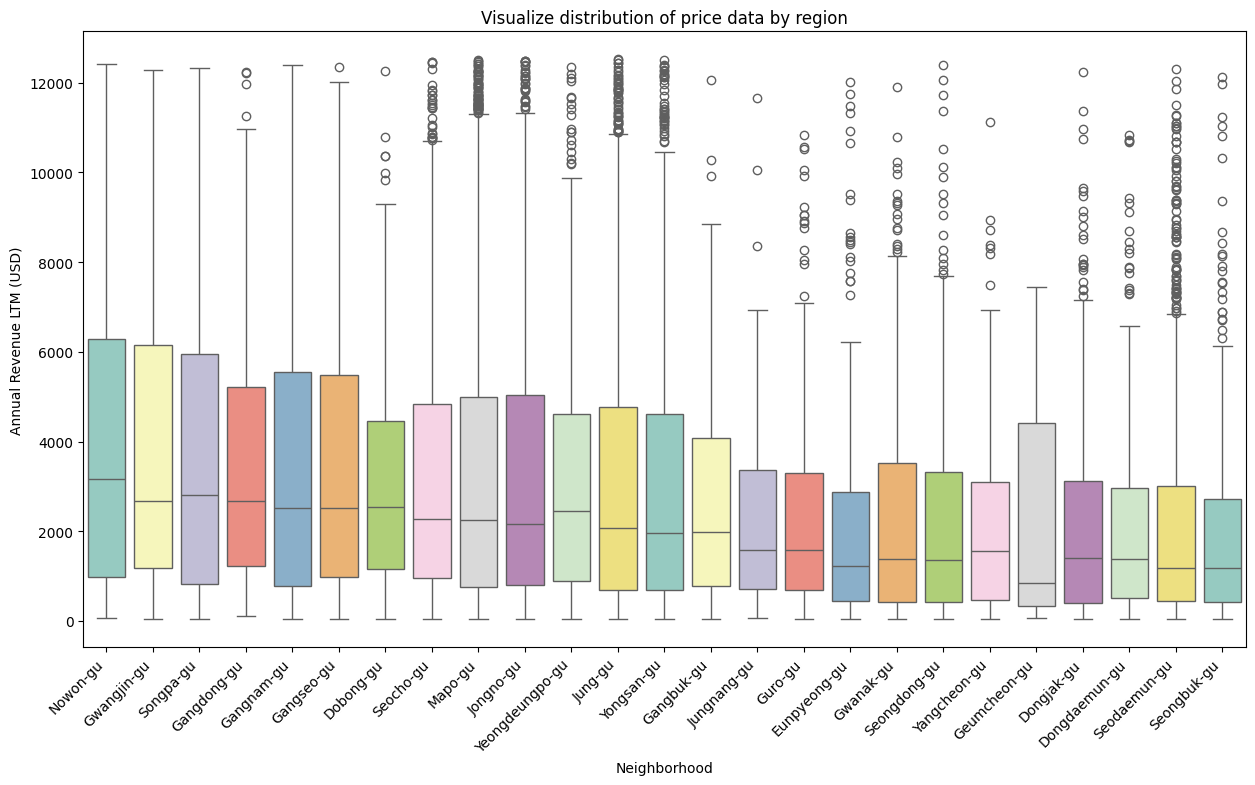

In [ ]:
# 각 지역별 가격 데이터를 박스플롯으로 시각화
plt.figure(figsize=(15, 8))  # 그래프 전체 크기 조절
sns.boxplot(data = data, x = 'Neighborhood', y = 'Annual Revenue LTM (USD)', palette='Set3',
            order=data.groupby('Neighborhood')['Annual Revenue LTM (USD)'].mean().sort_values(ascending=False).index)
plt.xlabel('Neighborhood')
plt.ylabel('Annual Revenue LTM (USD)')
plt.title('Visualize distribution of price data by region')
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-47-317ba704f499>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Neighborhood', y='Annual Revenue LTM (USD)', palette='Set3',


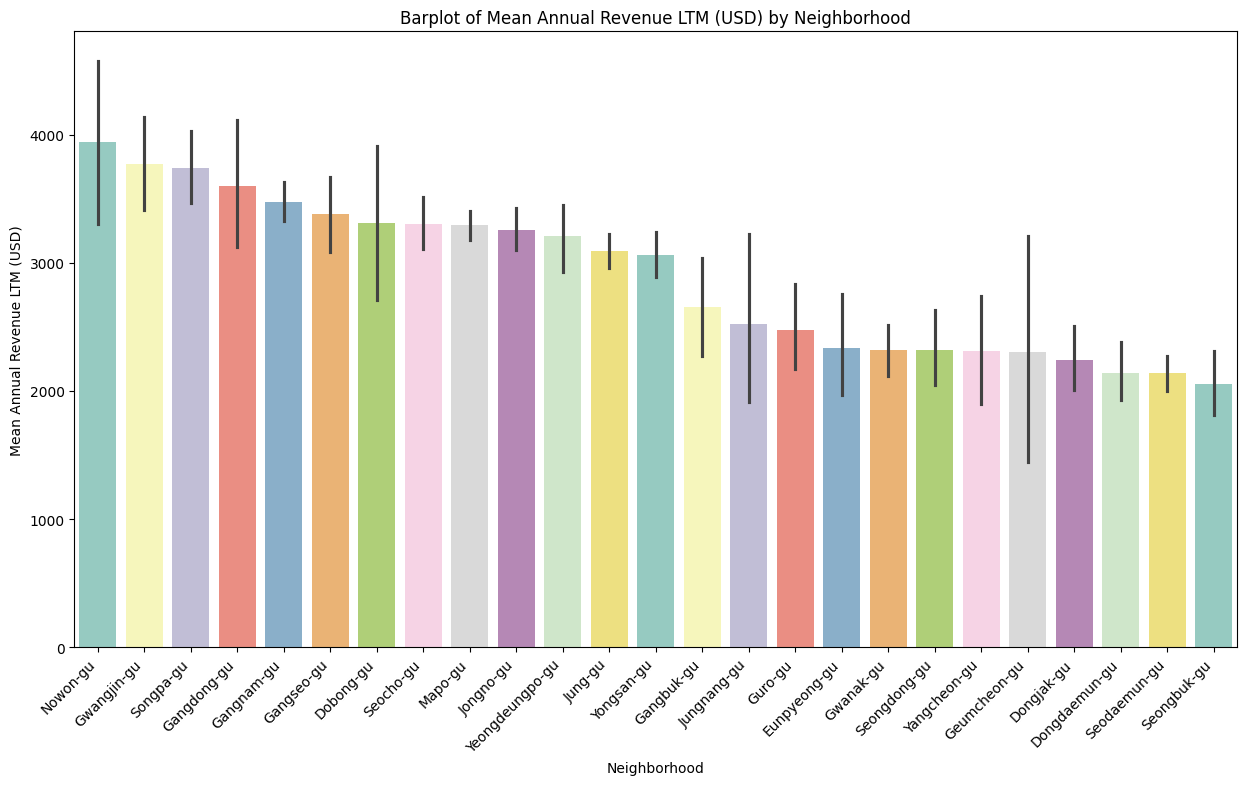

In [ ]:
plt.figure(figsize=(15, 8))  # 그래프 전체 크기 조절
sns.barplot(data=data, x='Neighborhood', y='Annual Revenue LTM (USD)', palette='Set3',
            order=data.groupby('Neighborhood')['Annual Revenue LTM (USD)'].mean().sort_values(ascending=False).index)
plt.xlabel('Neighborhood')
plt.ylabel('Mean Annual Revenue LTM (USD)')
plt.title('Barplot of Mean Annual Revenue LTM (USD) by Neighborhood')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
#자치단체에 따른 room_type의 분포
room_type_counts = data.groupby('Neighborhood')['Listing Type'].value_counts().unstack(0)
room_type_counts

Neighborhood,Dobong-gu,Dongdaemun-gu,Dongjak-gu,Eunpyeong-gu,Gangbuk-gu,Gangdong-gu,Gangnam-gu,Gangseo-gu,Geumcheon-gu,Guro-gu,...,Mapo-gu,Nowon-gu,Seocho-gu,Seodaemun-gu,Seongbuk-gu,Seongdong-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,Yongsan-gu
Listing Type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,76,175,186,131,120,126,1148,327,15,154,...,2034,89,607,594,152,219,382,81,338,742
Hotel room,0,2,10,1,0,0,43,3,0,0,...,42,0,0,26,0,2,0,0,8,1
Private room,9,186,170,58,30,15,370,61,12,66,...,1041,20,212,591,169,70,138,33,121,348
Shared room,1,3,6,1,0,1,52,14,0,4,...,119,0,1,37,3,8,4,0,10,60


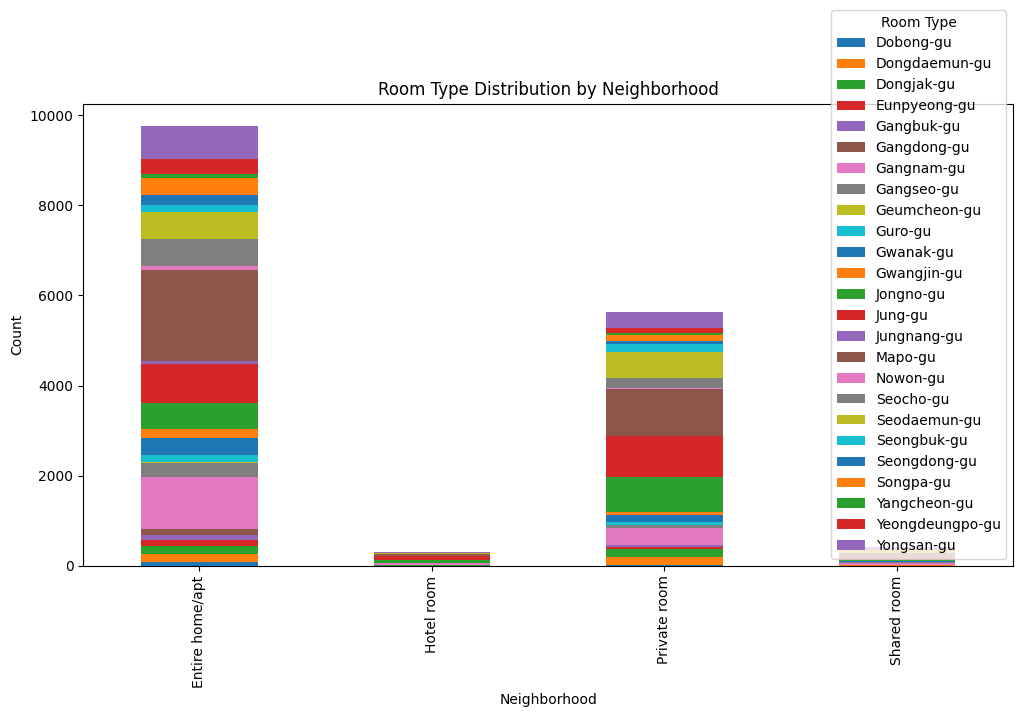

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
room_type_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Room Type Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()

<ipython-input-50-ef42bcca22ae>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Listing Type', y='Annual Revenue LTM (USD)', data=data, estimator='mean', ci=None, palette="viridis")
<ipython-input-50-ef42bcca22ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Listing Type', y='Annual Revenue LTM (USD)', data=data, estimator='mean', ci=None, palette="viridis")


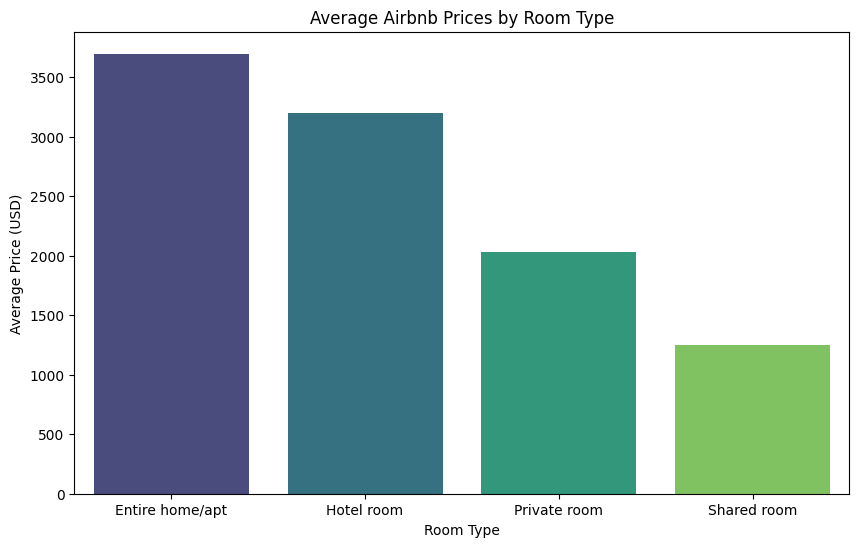

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Listing Type', y='Annual Revenue LTM (USD)', data=data, estimator='mean', ci=None, palette="viridis")
plt.title('Average Airbnb Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (USD)')
plt.show()

Entire home/apt, Hotel Room, Private room, Shared room순으로 가격이 높다.
집 전체를 빌려주는 유형(Entire home/apt, Hotel Room)의 Airbnb 가격이 집의 일부 또는 방만 빌려주는 유형(Private room, Shared room)보다 높은 것을 알 수 있다.  

종속변수 분포 확인

In [ ]:
raw_X = data.drop('Annual Revenue LTM (USD)', axis=1)
raw_y = data['Annual Revenue LTM (USD)']

(array([1548.,  972.,  853.,  720.,  644.,  557.,  511.,  472.,  390.,
         365.,  344.,  309.,  314.,  290.,  276.,  286.,  258.,  263.,
         240.,  192.,  212.,  189.,  195.,  172.,  189.,  163.,  169.,
         147.,  150.,  134.,  144.,  125.,  133.,  115.,  108.,  103.,
          88.,  104.,   92.,  107.,  113.,   72.,   76.,   64.,   78.,
          64.,   73.,   65.,   67.,   54.,   60.,   60.,   50.,   51.,
          57.,   38.,   49.,   41.,   40.,   48.,   34.,   43.,   28.,
          26.,   37.,   40.,   36.,   35.,   24.,   30.,   37.,   31.,
          40.,   27.,   25.,   27.,   26.,   32.,   21.,   26.,   21.,
          18.,   21.,   20.,   17.,   16.,   22.,   27.,   25.,   14.,
          20.,   18.,   28.,   21.,   13.,   23.,   12.,   12.,   19.,
          12.]),
 array([   34.  ,   227.41,   420.82,   614.23,   807.64,  1001.05,
         1194.46,  1387.87,  1581.28,  1774.69,  1968.1 ,  2161.51,
         2354.92,  2548.33,  2741.74,  2935.15,  3128.56,  3321.97

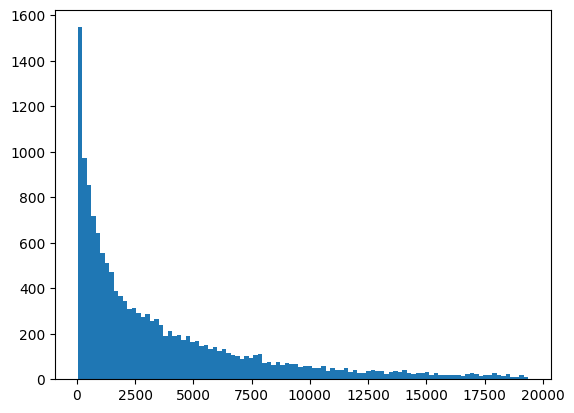

In [ ]:
plt.hist(raw_y, bins = 100)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14867 entries, 87 to 78380
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Annual Revenue LTM (USD)        14867 non-null  float64 
 1   Occupancy Rate LTM              14867 non-null  float64 
 2   Number of Bookings LTM          14867 non-null  int64   
 3   Number of Reviews               14867 non-null  float64 
 4   Bedrooms                        14867 non-null  float64 
 5   Max Guests                      14867 non-null  float64 
 6   Response Rate                   14867 non-null  float64 
 7   Airbnb Response Time (Text)     14867 non-null  category
 8   Airbnb Superhost                14867 non-null  int64   
 9   Cleaning Fee (USD)              14867 non-null  float64 
 10  Extra People Fee (USD)          14867 non-null  float64 
 11  Published Nightly Rate (USD)    14867 non-null  float64 
 12  Minimum Stay     

스피어만 순위 상관계수

<ipython-input-65-2303ee6c7283>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = data.corr(method='spearman')


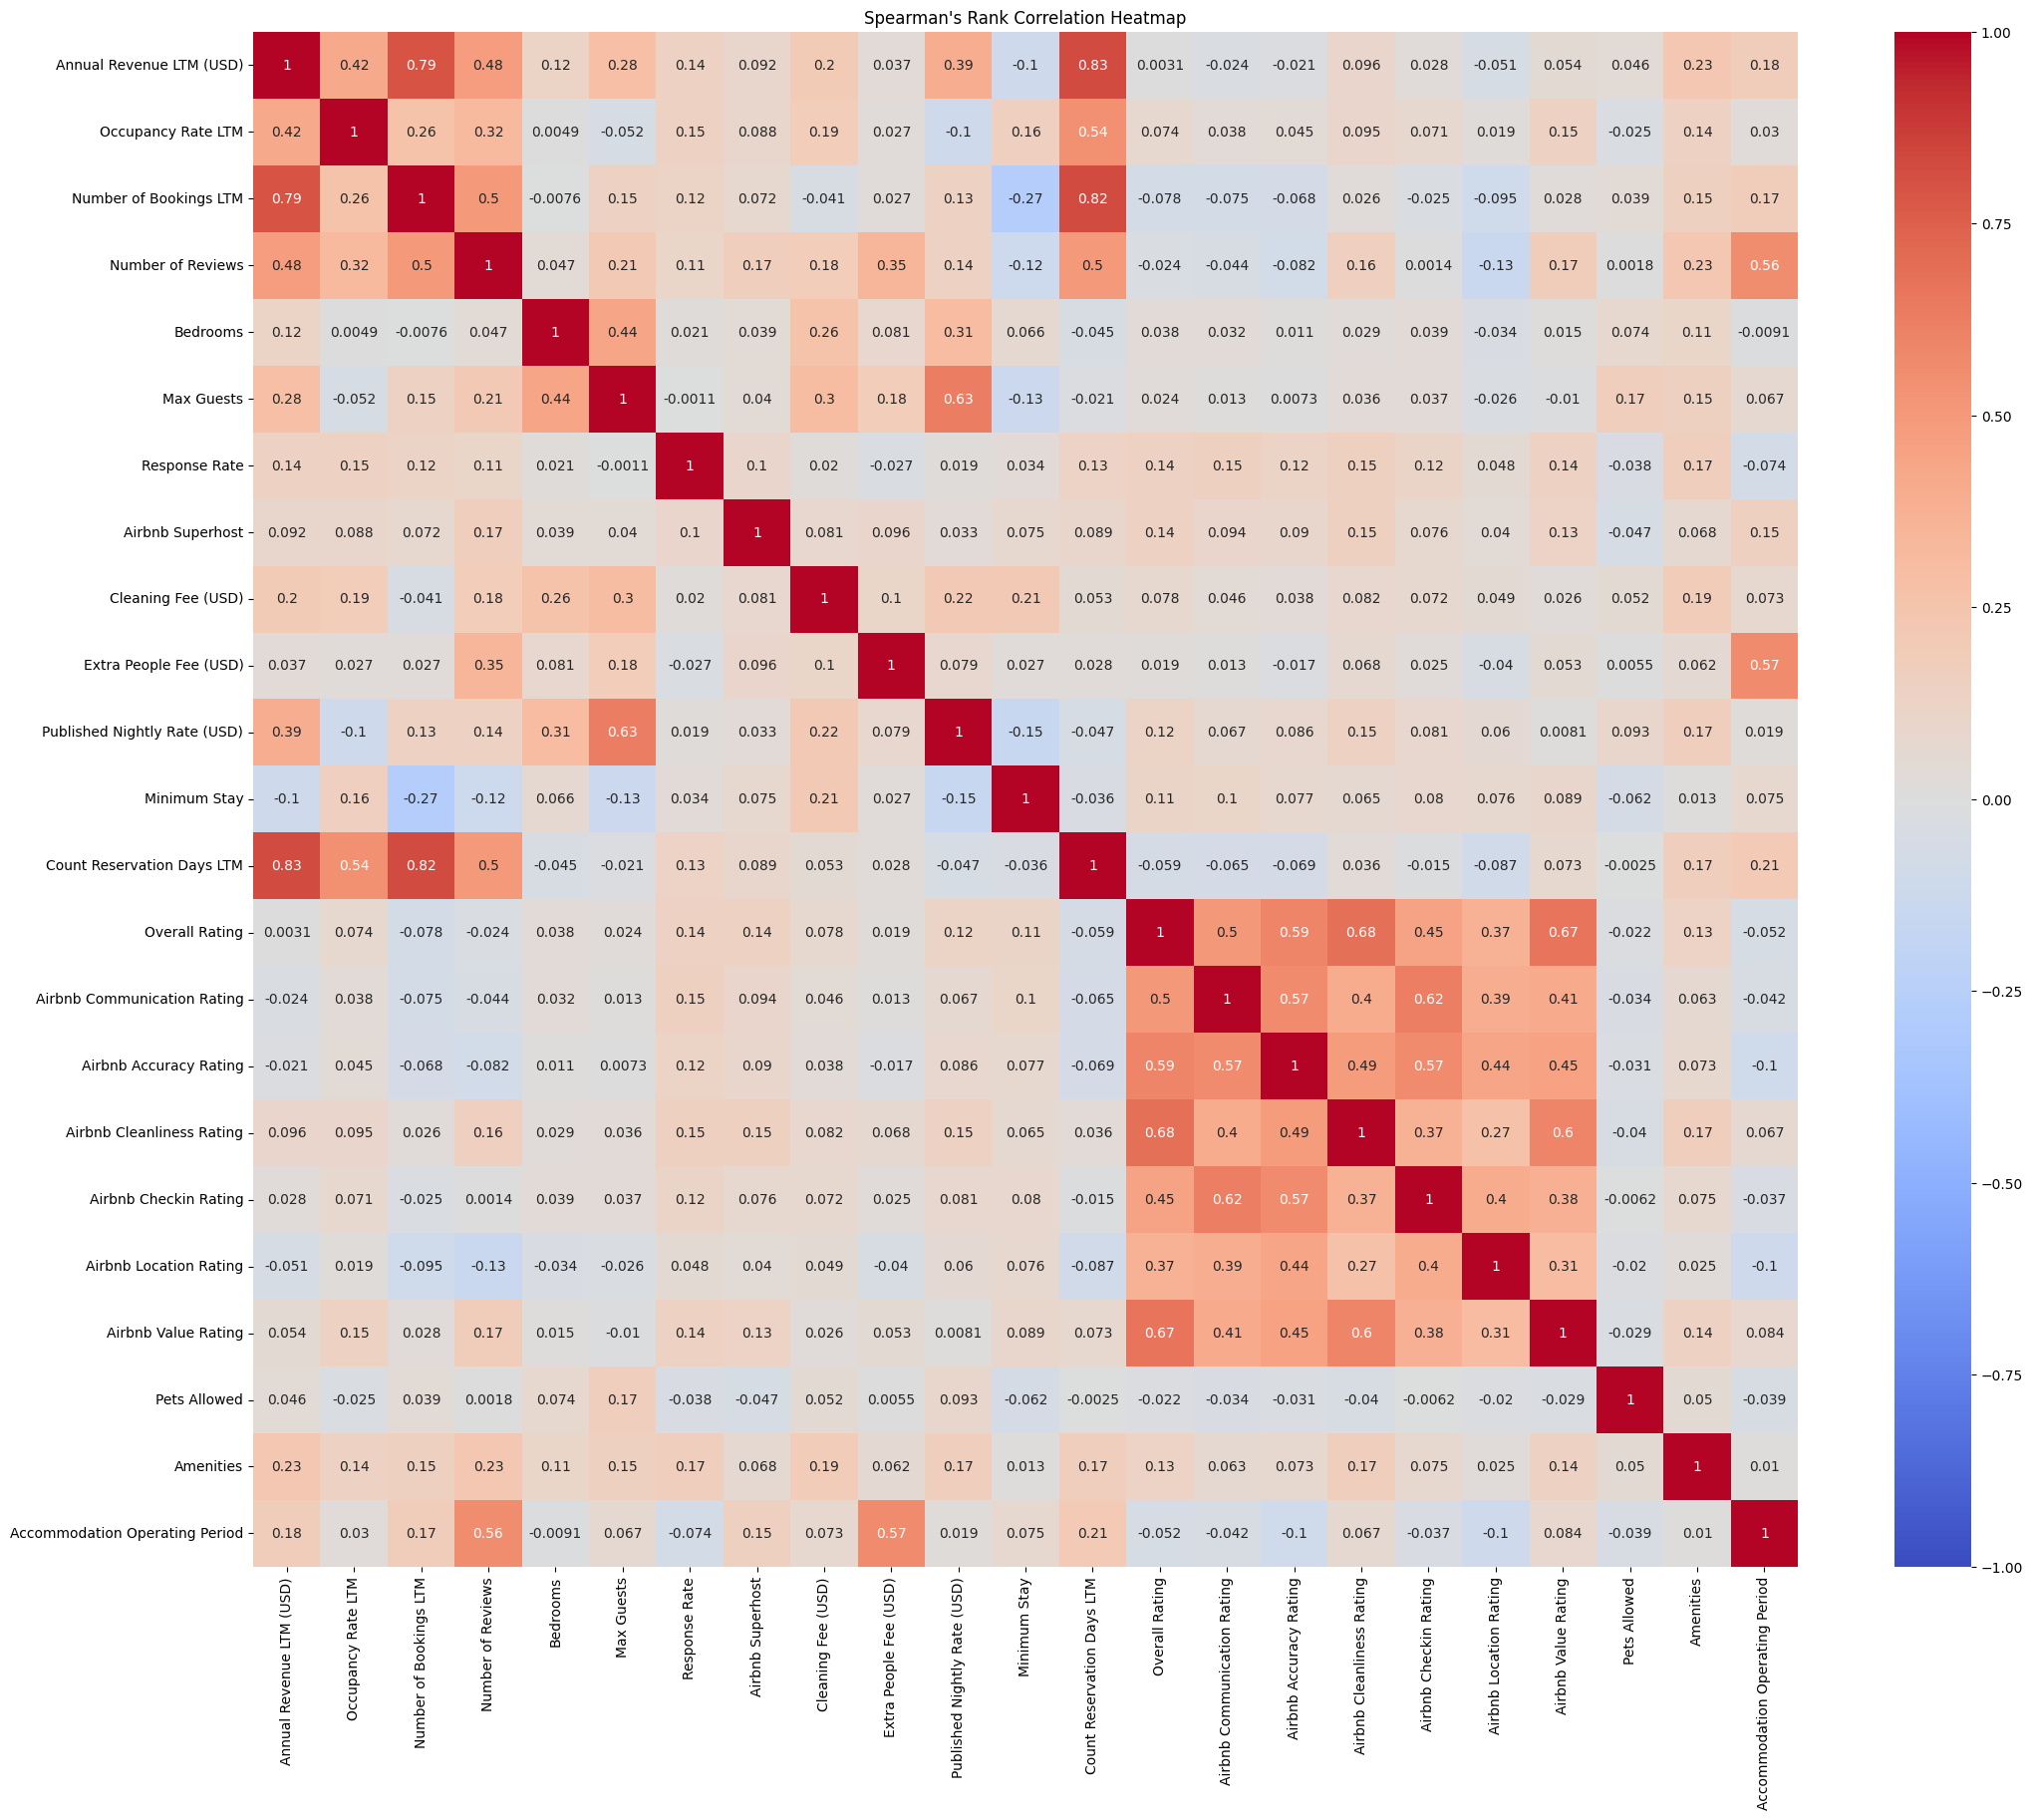

In [ ]:
spearman_corr = data.corr(method='spearman')
plt.figure(figsize=(25, 20))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank Correlation Heatmap")
plt.show()

In [ ]:
# 'Annual Revenue LTM (USD)'와의 상관 계수를 기준으로 정렬
sorted_corr_with_target = spearman_corr['Number of Bookings LTM'].abs().sort_values(ascending=False)
print(sorted_corr_with_target)

Number of Bookings LTM            1.000000
Count Reservation Days LTM        0.823592
Annual Revenue LTM (USD)          0.790361
Number of Reviews                 0.498009
Minimum Stay                      0.272391
Occupancy Rate LTM                0.257940
Accommodation Operating Period    0.173933
Amenities                         0.154667
Max Guests                        0.145450
Published Nightly Rate (USD)      0.134393
Response Rate                     0.118919
Airbnb Location Rating            0.095355
Overall Rating                    0.078006
Airbnb Communication Rating       0.075225
Airbnb Superhost                  0.072282
Airbnb Accuracy Rating            0.068404
Cleaning Fee (USD)                0.040634
Pets Allowed                      0.039268
Airbnb Value Rating               0.028096
Extra People Fee (USD)            0.027303
Airbnb Cleanliness Rating         0.025525
Airbnb Checkin Rating             0.025352
Bedrooms                          0.007629
Name: Numbe

In [ ]:
# 'Annual Revenue LTM (USD)'와의 상관 계수를 기준으로 정렬
sorted_corr_with_target = spearman_corr['Count Reservation Days LTM'].abs().sort_values(ascending=False)
print(sorted_corr_with_target)

Count Reservation Days LTM        1.000000
Annual Revenue LTM (USD)          0.827781
Number of Bookings LTM            0.823592
Occupancy Rate LTM                0.542134
Number of Reviews                 0.495318
Accommodation Operating Period    0.209753
Amenities                         0.169093
Response Rate                     0.132746
Airbnb Superhost                  0.088510
Airbnb Location Rating            0.086969
Airbnb Value Rating               0.072601
Airbnb Accuracy Rating            0.069125
Airbnb Communication Rating       0.064683
Overall Rating                    0.058624
Cleaning Fee (USD)                0.053010
Published Nightly Rate (USD)      0.047258
Bedrooms                          0.044960
Minimum Stay                      0.036309
Airbnb Cleanliness Rating         0.036186
Extra People Fee (USD)            0.028253
Max Guests                        0.020798
Airbnb Checkin Rating             0.014868
Pets Allowed                      0.002465
Name: Count

In [ ]:
# 'Annual Revenue LTM (USD)'와의 상관 계수를 기준으로 정렬
sorted_corr_with_target = spearman_corr['Occupancy Rate LTM'].abs().sort_values(ascending=False)
print(sorted_corr_with_target)

Occupancy Rate LTM                1.000000
Count Reservation Days LTM        0.542134
Annual Revenue LTM (USD)          0.421647
Number of Reviews                 0.316317
Number of Bookings LTM            0.257940
Cleaning Fee (USD)                0.185388
Minimum Stay                      0.161734
Airbnb Value Rating               0.147436
Response Rate                     0.146895
Amenities                         0.142202
Published Nightly Rate (USD)      0.104976
Airbnb Cleanliness Rating         0.094921
Airbnb Superhost                  0.087982
Overall Rating                    0.074444
Airbnb Checkin Rating             0.070668
Max Guests                        0.052340
Airbnb Accuracy Rating            0.045421
Airbnb Communication Rating       0.038142
Accommodation Operating Period    0.030457
Extra People Fee (USD)            0.026738
Pets Allowed                      0.025211
Airbnb Location Rating            0.018926
Bedrooms                          0.004920
Name: Occup

In [ ]:
# 'Annual Revenue LTM (USD)'와의 상관 계수를 기준으로 정렬
sorted_corr_with_target = spearman_corr['Number of Reviews'].abs().sort_values(ascending=False)
print(sorted_corr_with_target)

Number of Reviews                 1.000000
Accommodation Operating Period    0.557784
Number of Bookings LTM            0.498009
Count Reservation Days LTM        0.495318
Annual Revenue LTM (USD)          0.481468
Extra People Fee (USD)            0.350698
Occupancy Rate LTM                0.316317
Amenities                         0.233294
Max Guests                        0.213558
Cleaning Fee (USD)                0.182117
Airbnb Value Rating               0.173244
Airbnb Superhost                  0.168876
Airbnb Cleanliness Rating         0.158376
Published Nightly Rate (USD)      0.135920
Airbnb Location Rating            0.133191
Minimum Stay                      0.116344
Response Rate                     0.106124
Airbnb Accuracy Rating            0.082005
Bedrooms                          0.046528
Airbnb Communication Rating       0.044036
Overall Rating                    0.023785
Pets Allowed                      0.001778
Airbnb Checkin Rating             0.001417
Name: Numbe

In [ ]:
# 'Annual Revenue LTM (USD)'와의 상관 계수를 기준으로 정렬
sorted_corr_with_target = spearman_corr['Airbnb Value Rating'].abs().sort_values(ascending=False)
print(sorted_corr_with_target)

Airbnb Value Rating               1.000000
Overall Rating                    0.665107
Airbnb Cleanliness Rating         0.600170
Airbnb Accuracy Rating            0.453800
Airbnb Communication Rating       0.409035
Airbnb Checkin Rating             0.376043
Airbnb Location Rating            0.308842
Number of Reviews                 0.173244
Occupancy Rate LTM                0.147436
Amenities                         0.137115
Response Rate                     0.135324
Airbnb Superhost                  0.131702
Minimum Stay                      0.089393
Accommodation Operating Period    0.083652
Count Reservation Days LTM        0.072601
Annual Revenue LTM (USD)          0.053909
Extra People Fee (USD)            0.053221
Pets Allowed                      0.029328
Number of Bookings LTM            0.028096
Cleaning Fee (USD)                0.025686
Bedrooms                          0.014991
Max Guests                        0.009995
Published Nightly Rate (USD)      0.008147
Name: Airbn

In [ ]:
# 'Annual Revenue LTM (USD)'와의 상관 계수를 기준으로 정렬
sorted_corr_with_target = spearman_corr['Published Nightly Rate (USD)'].abs().sort_values(ascending=False)
print(sorted_corr_with_target)

Published Nightly Rate (USD)      1.000000
Max Guests                        0.628124
Annual Revenue LTM (USD)          0.394184
Bedrooms                          0.311913
Cleaning Fee (USD)                0.216566
Amenities                         0.167448
Minimum Stay                      0.152642
Airbnb Cleanliness Rating         0.147148
Number of Reviews                 0.135920
Number of Bookings LTM            0.134393
Overall Rating                    0.122928
Occupancy Rate LTM                0.104976
Pets Allowed                      0.093348
Airbnb Accuracy Rating            0.085648
Airbnb Checkin Rating             0.080945
Extra People Fee (USD)            0.078873
Airbnb Communication Rating       0.066925
Airbnb Location Rating            0.059949
Count Reservation Days LTM        0.047258
Airbnb Superhost                  0.032769
Response Rate                     0.019146
Accommodation Operating Period    0.018715
Airbnb Value Rating               0.008147
Name: Publi

mRMR

변수선택

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(['Annual Revenue LTM (USD)'], axis = 1)
y = data['Annual Revenue LTM (USD)']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle=True, random_state=1)


mRMR


In [66]:
k = 10
S = []


# Calculate the Spearman correlation matrix
corr_matrix = data.corr(method='spearman')

# Remove the target variable from the correlation matrix
corr_matrix = corr_matrix.drop('Annual Revenue LTM (USD)', axis=0)

# Find the feature with the highest relevance (minimum redundancy)
highest_corr_idx = np.argmin(np.abs(corr_matrix['Annual Revenue LTM (USD)']))
first_feature = corr_matrix.index[highest_corr_idx]

S.append(first_feature)

for i in range(k - 1):
    relevance = np.abs(corr_matrix['Annual Revenue LTM (USD)'])
    redundancy = np.mean(np.abs(corr_matrix.loc[:, S]), axis=1)
    candidate_feature = relevance - redundancy
    candidate_feature = candidate_feature.drop(S)
    best_x_idx = np.argmax(candidate_feature)
    next_feature = candidate_feature.index[best_x_idx]
    S.append(next_feature)

<ipython-input-66-75b3c9dd2c8c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')


In [67]:
S

['Overall Rating',
 'Count Reservation Days LTM',
 'Number of Bookings LTM',
 'Published Nightly Rate (USD)',
 'Number of Reviews',
 'Occupancy Rate LTM',
 'Max Guests',
 'Amenities',
 'Cleaning Fee (USD)',
 'Accommodation Operating Period']

In [68]:
mrmr_features = S.copy()

In [69]:
mrmr_X_train = X_train[mrmr_features]
mrmr_X_test = X_test[mrmr_features]

RandomForest

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=122)

# Train the regressor
rf_regressor.fit(mrmr_X_train, y_train)

y_pred = rf_regressor.predict(mrmr_X_test)

# Evaluate the performance of the model (you may use other metrics depending on your problem)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 716251.0751573673


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use the trained model to make predictions on new data
test_pred = rf_regressor.predict(mrmr_X_test)

# Evaluate the performance of the regression model
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

# Adjusted R-squared calculation
n = len(y_test)
k = mrmr_X_test.shape[1]  # Assuming mrmr_X_test is the feature matrix used in testing
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print('[mRMR 변수 선택]')
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)

[mRMR 변수 선택]
Mean Absolute Error: 417.3315288948666
Mean Squared Error: 716251.0751573673
R-squared (R2): 0.9567924256149429
Adjusted R-squared: 0.9566466018741902


In [60]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = mrmr_X_train.columns  # Assuming you have column names

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the sorted feature importances
print('[mRMR 변수 선택]')
print(feature_importance_df)

[mRMR 변수 선택]
                          Feature  Importance
2          Number of Bookings LTM    0.329775
1      Count Reservation Days LTM    0.305362
3    Published Nightly Rate (USD)    0.248412
5              Occupancy Rate LTM    0.084022
8              Cleaning Fee (USD)    0.009023
7                       Amenities    0.006291
6                      Max Guests    0.005440
9  Accommodation Operating Period    0.004988
4               Number of Reviews    0.003979
0                  Overall Rating    0.002706


LightGBM

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
    'gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
    'lambda': [0.01, 0.1, 1.0],
    'alpha': [0, 0.1, 0.5, 1.0],
}

In [74]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LGBMRegressor 모델 생성
lgb_regressor = lgb.LGBMRegressor()

# RandomizedSearchCV를 위한 하이퍼파라미터 설정
lgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 1, 2],
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
rnd_search = RandomizedSearchCV(
    estimator=lgb_regressor,
    param_distributions=lgb_params,
    scoring='neg_mean_squared_error',  # 회귀 모델을 위한 평가 지표 (MSE의 음수값)
    n_iter=100,
    cv=KFold(n_splits=10, shuffle=True, random_state=486),
    random_state=486,
)

# 훈련 데이터에 모델 훈련
cv_res = rnd_search.fit(mrmr_X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = cv_res.predict(mrmr_X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)

# R-squared 계산
r_squared = r2_score(y_test, y_pred)

# Adjusted R-squared 계산
n = len(y_test)
k = mrmr_X_test.shape[1]  # 독립 변수의 수
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

# 변수 중요도 출력
feature_importance = cv_res.best_estimator_.feature_importances_
feature_names = mrmr_X_train.columns

# 중요도를 변수명과 함께 출력
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

# 결과 출력
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [82]:
# 변수 중요도 출력 (기본값은 'split'이지만 명시적으로 'gain'으로 설정)
feature_importance_gain = cv_res.best_estimator_.booster_.feature_importance(importance_type='gain')
feature_names = mrmr_X_train.columns

# Gain 중요도를 변수명과 함께 출력 (내림차순 정렬)
sorted_feature_importance = sorted(zip(feature_names, feature_importance_gain), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Count Reservation Days LTM: 388826816198.7012
Published Nightly Rate (USD): 276143519242.4961
Number of Bookings LTM: 268151911069.29688
Occupancy Rate LTM: 88902282775.20312
Cleaning Fee (USD): 16527980130.60254
Max Guests: 4977308155.0
Amenities: 2985043374.611328
Accommodation Operating Period: 2526218437.3222656
Number of Reviews: 1555034641.8007812
Overall Rating: 728642582.203125


예약율 변수 스피어만 순위 상관계수 상위 7개 출력

In [ ]:

corr_with_target = spearman_corr[['Number of Bookings LTM', 'Count Reservation Days LTM', 'Occupancy Rate LTM']]

# 데이터프레임 초기화
top_corr_df = pd.DataFrame()

# 각 변수에 대해 상위 5개의 상관 관계 선택
for column in corr_with_target.columns:
    # 현재 변수를 기준으로 정렬된 상관 계수
    sorted_corr = corr_with_target[column].abs().sort_values(ascending=False)

    # 자기 자신을 제외하고 가장 큰 5개의 상관 관계 선택
    top_corr_variables = sorted_corr[sorted_corr.index != column].head(8)

    # 상위 5개의 변수와 상관 계수를 담은 데이터프레임 생성
    temp_df = pd.DataFrame({
        f'{column}_Variable': top_corr_variables.index,
        f'{column}_Correlation': top_corr_variables.values
    })

    # 데이터프레임을 합치기
    top_corr_df = pd.concat([top_corr_df, temp_df], axis=1)

# 결과 출력
print(top_corr_df)


  Number of Bookings LTM_Variable  Number of Bookings LTM_Correlation  \
0      Count Reservation Days LTM                            0.823592   
1        Annual Revenue LTM (USD)                            0.790361   
2               Number of Reviews                            0.498009   
3                    Minimum Stay                            0.272391   
4              Occupancy Rate LTM                            0.257940   
5  Accommodation Operating Period                            0.173933   
6                       Amenities                            0.154667   
7                      Max Guests                            0.145450   

  Count Reservation Days LTM_Variable  Count Reservation Days LTM_Correlation  \
0            Annual Revenue LTM (USD)                                0.827781   
1              Number of Bookings LTM                                0.823592   
2                  Occupancy Rate LTM                                0.542134   
3                 